In [3]:
import pandas as pd
df=pd.read_csv('household_dataset.csv')
print(df)

    Household_ID  Age_of_Household_Head  Household_Income Education_Level  \
0          H1000                     63             72623         Primary   
1          H1001                     53             85450        Graduate   
2          H1002                     39            103426        Graduate   
3          H1003                     67            127845       Post-Grad   
4          H1004                     32             53585         Primary   
..           ...                    ...               ...             ...   
155        H1155                     28             73208         Primary   
156        H1156                     54             43828        Graduate   
157        H1157                     61             13420       Post-Grad   
158        H1158                     47            106752        Graduate   
159        H1159                     63            141373         Primary   

     Family_Size Owns_House Urban_Rural  
0              6         No      

In [ ]:
for col in df.columns:
    sample = df[col].dropna().astype(str).head(10)
    if sample.str.isnumeric().all():
        print(f"{col}: Numerical")
    else:
        print(f"{col}: Categorical")

Household_ID: Categorical
Age_of_Household_Head: Numerical
Household_Income: Numerical
Education_Level: Categorical
Family_Size: Numerical
Owns_House: Categorical
Urban_Rural: Categorical


In [19]:
print('Household Income:')
print(f'Mean- {df['Household_Income'].mean()}')
print(f'Median- {df['Household_Income'].median()}')
print(f'Mode- {df['Household_Income'].mode()}')

print('\n---------------------------\n\nAge:')
print(f'Mean- {df['Age_of_Household_Head'].mean()}')
print(f'Median- {df['Age_of_Household_Head'].median()}')
print(f'Mode- {df['Age_of_Household_Head'].mode()}')

Household Income:
Mean- 86202.275
Median- 91806.0
Mode- 0       12693
1       12869
2       13420
3       13748
4       14499
        ...  
155    146672
156    146967
157    147848
158    147965
159    149752
Name: Household_Income, Length: 160, dtype: int64

---------------------------

Age:
Mean- 49.01875
Median- 49.0
Mode- 0    48
1    63
2    68
Name: Age_of_Household_Head, dtype: int64


In [5]:
def interpret_series(s, name):
    s_clean = s.dropna()
    mean = s_clean.mean()
    median = s_clean.median()
    modes = s_clean.mode().tolist()
    skew = s_clean.skew()

interpret_series(df['Household_Income'], 'Household_Income')
interpret_series(df['Age_of_Household_Head'], 'Age_of_Household_Head')
print(df[['Household_Income','Age_of_Household_Head']].describe())

       Household_Income  Age_of_Household_Head
count        160.000000             160.000000
mean       86202.275000              49.018750
std        41541.843581              14.307702
min        12693.000000              25.000000
25%        49376.250000              37.750000
50%        91806.000000              49.000000
75%       122550.500000              61.250000
max       149752.000000              74.000000


In [3]:
import pandas as pd

income = pd.to_numeric(df['Household_Income']).dropna()
range = income.max() - income.min()
variance = income.var()
std = income.std()

print(f'  Min: {income.min()}')
print(f'  Max: {income.max()}')
print(f'  Range: {range}')
print(f'  Variance: {variance}')
print(f'  Std Dev: {std}')

  Min: 12693
  Max: 149752
  Range: 137059
  Variance: 1725724768.1000001
  Std Dev: 41541.84358090045


Text(0, 0.5, 'Frequency')

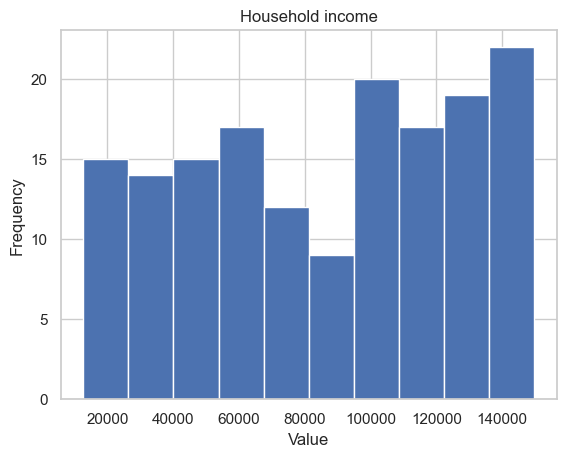

In [5]:
import matplotlib.pyplot as plt
df['Household_Income'].hist()
plt.title('Household income')
plt.xlabel('Value')
plt.ylabel('Frequency')

In [13]:
import pandas as pd
from scipy.stats import skew, kurtosis

income = pd.to_numeric(df['Household_Income'])
income_skew = skew(income)
income_kurtosis = kurtosis(income)

print(f"Skewness of Household Income: {income_skew}")
print(f"Kurtosis of Household Income: {income_kurtosis}")

Skewness of Household Income: -0.17247859869903534
Kurtosis of Household Income: -1.2813837718989858


C:\Users\adity\AppData\Local\Temp\ipykernel_14824\1350322507.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Education_Level', y='Household_Income', data=df, palette='pastel')


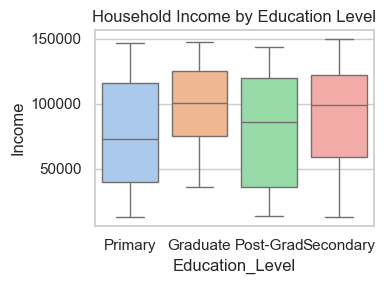

In [25]:
import seaborn as sns

edu_order = ['Primary', 'Secondary', 'Graduate', 'Post-Grad']
plt.figure(figsize=(4,3))
sns.boxplot(x='Education_Level', y='Household_Income', data=df, palette='pastel')
plt.title('Household Income by Education Level')
plt.ylabel('Income')
plt.tight_layout()
plt.show()

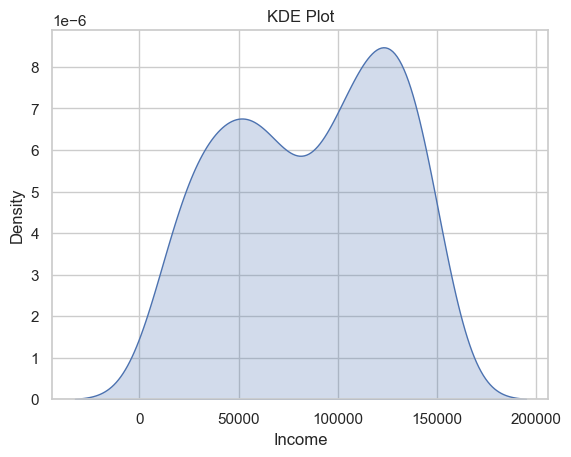

In [27]:
sns.kdeplot(data=df, x='Household_Income', fill=True)
plt.title('KDE Plot')
plt.xlabel('Income')
plt.ylabel('Density')
plt.show()

C:\Users\adity\AppData\Local\Temp\ipykernel_14824\3620557304.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Education_Level', y='Family_Size', data=df, order=edu_order, palette='pastel')


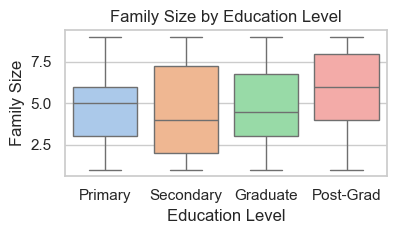

In [26]:
edu_order = ['Primary', 'Secondary', 'Graduate', 'Post-Grad']

plt.figure(figsize=(4,2.5))
sns.boxplot(x='Education_Level', y='Family_Size', data=df, order=edu_order, palette='pastel')
plt.title('Family Size by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Family Size')
plt.tight_layout()
plt.show()